## FRANCE COVID-19 Data Analysis, Part 1: Graphical updated comparision of the epidemic spread in french department.


### import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation
from download import download
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
import data 
import preprocess
import ipywidgets

In [2]:
from data.viz import *


### Import Data

In [3]:
file_name = 'data/santé_publique_France_data-chiffres-cles.csv'
url = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)
_data = pd.read_csv('data/santé_publique_France_data-chiffres-cles.csv')

C:\Users\Jihene Belgaied\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
_data = enable_time_series_plot(_data, timein_field="date", timeseries_field_out="t")


C:\Users\Jihene Belgaied\anaconda3\lib\site-packages\data\viz.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df[timeseries_field_out] = pd.to_datetime(


In [7]:
_data = _data.loc[_data['granularite']=="departement",:]


### We will use for this analysis only data from "Santé publique France"

In [8]:
_data=_data.loc[_data["source_nom"] == "Santé publique France Data",:]


In [9]:
_data['date'] = pd.to_datetime(_data['date'])


### We set the current date for the chart : 

In [10]:
current_date = _data['date'].max().strftime('%d/%m/%Y')


Create different datasets useful for the charts : 

In [11]:
gb_data= _data[_data['date'] == _data['date'].max()].reset_index()
current_date = gb_data['date'].max().strftime('%d/%m/%Y')
#hospitalisees total = hospitalises + gueris
data_ratio_hospitalises = (gb_data['deces'] / (gb_data['hospitalises'] + gb_data['gueris'])) * 100
data_hospitalises = gb_data['hospitalises'] + gb_data['gueris']
data_deces = gb_data['deces']
data_depcode = gb_data['maille_nom']


**Ratio des descès par rapport au nombre d'hospitalisations à la date updated :** 

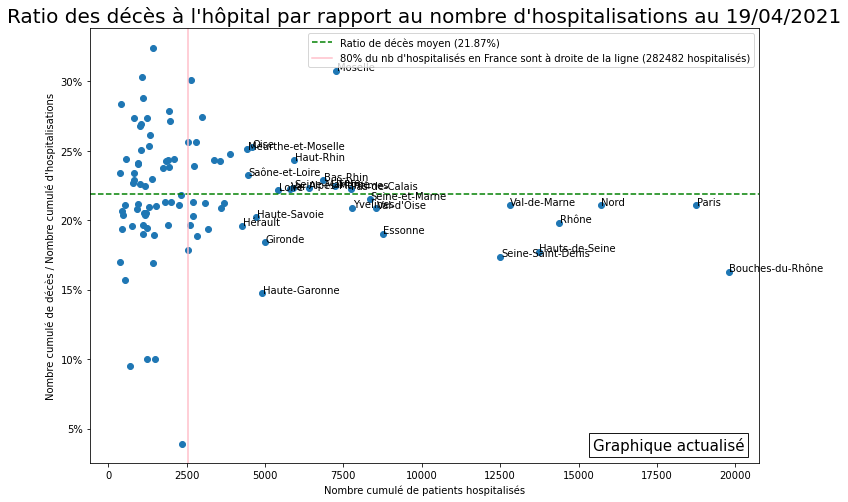

In [15]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(12, 8))

plt.title(f"Ratio des décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=20)
plt.ylabel("Nombre cumulé de décès / Nombre cumulé d'hospitalisations")
plt.xlabel("Nombre cumulé de patients hospitalisés")

nbhospitalises_80p = data_hospitalises.sum() * 0.80
min_value_80p = data_hospitalises.loc[data_hospitalises[data_hospitalises.sort_values(ascending=False).cumsum() <= nbhospitalises_80p].index].min()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
    #if (data_hospitalises[i] > min_value_80p):
        ax.annotate(txt, (data_hospitalises[i], data_ratio_hospitalises[i]), xytext=(data_hospitalises[i] + 20, data_ratio_hospitalises[i]))        

plt.axhline(data_ratio_hospitalises.mean(), color='green', linestyle='--', label=f'Ratio de décès moyen ({data_ratio_hospitalises.mean():.2f}%)')

plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")

ax.scatter(data_hospitalises, data_ratio_hospitalises)

ax.annotate('Graphique actualisé',xy=(1, 0), xytext=(-15, 10), fontsize=15,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.9),
    horizontalalignment='right', verticalalignment='bottom')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
plt.legend()

current_date_file = gb_data['date'].max().strftime('%Y%m%d')
plt.savefig('covid19-comparatif-departements-'+str(current_date_file)+'.png')

**Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations à la date updated**

Text(-5, 5, 'updated chart')

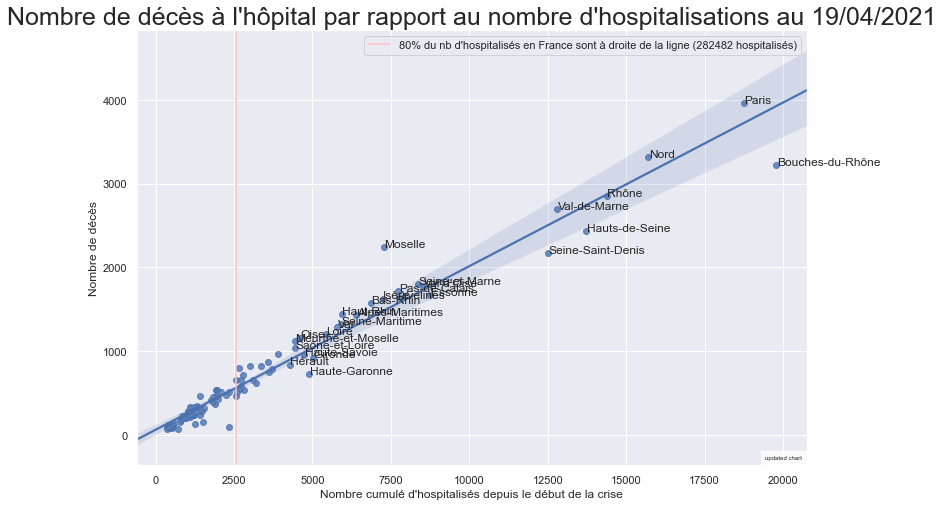

In [16]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(12, 8))

plt.title(f"Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=25)
# Set x-axis label

ax = sns.regplot(x=data_hospitalises, y=data_deces, ci=99.9, truncate=False)

ax.set(xlabel="Nombre cumulé d'hospitalisés depuis le début de la crise", ylabel='Nombre de décès')
plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")
plt.legend()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
        ax.annotate(txt, (data_hospitalises[i], data_deces[i]), xytext=(data_hospitalises[i] + 20, data_deces[i]))      
        #ax.annotate(txt, (data_hospitalises[i], data_hospitalises[i]))      
        
ax.annotate('updated chart', xy=(1, 0), xytext=(-5, 5), fontsize=6,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.8),
    horizontalalignment='right', verticalalignment='bottom')
        
#plt.savefig('covid19-comparatif-departements-regplot-'+str(current_date_file)+'.png')